In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import os
import random

In [12]:
path = ''
img_path_list = os.listdir(path)

In [179]:
def rename(path,i):
    img_path_list = os.listdir(path)
    for num, img_path in enumerate(img_path_list):
        img = cv2.imread(os.path.join(path, img_path))
        os.remove(os.path.join(path, img_path))
        cv2.imwrite('{}/{}{}{}.jpg'.format(path,path,i,num),img)

In [181]:
def img_aug1(path):
    img = cv2.imread(path)
    
    if img is None:
        return None
    
    new_img = np.zeros(img.shape, dtype = np.float64)
    
    for i in range(3):
        subimg = img[:,:,i]
        mean = np.mean(subimg)
        subimg = subimg - mean
        a1 = np.random.rand()
        a2 = np.random.rand()
        #new_subimg = (0.5 + 0.3 * a1) * (subimg + mean) + 0.2 * a2 * mean
        new_subimg = (1.0 + a1 * 0.5) * subimg + (1.0 +a2 * 0.5) * mean
        new_subimg = (new_subimg - np.min(new_subimg))/(np.max(new_subimg) - np.min(new_subimg)) * 255.0
        new_img[:,:,i] = new_subimg
        
    new_img = new_img.astype(np.uint8)
    return new_img

In [180]:
rename('cigarette',3)

NameError: name 'img_aug1' is not defined

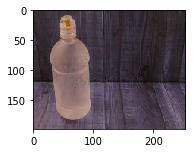

In [5]:
img = cv2.imread('bottle/bottle242.jpg')
plt.subplot(1,2,1)
plt.imshow(img)
new_img = img_aug1('bottle/bottle242.jpg')
plt.subplot(1,2,2)
plt.imshow(new_img)

In [183]:
import random
list1 = [2,8,19,20,38,57,59,66,71,78,89,91,110,116,121,133,156,170,177,184,215,224,225,235,239,251,254,240,144]
list2 = [x for x in range(256) if x not in list1]
list3 = [5,31,55,73,83,98,126,127,183,214,253,262]
path = 'cigarette'
path_list = [os.path.join(path,x) for x in os.listdir(path)]
sample = random.sample(path_list, 100)
for num,path in enumerate(sample):
    new_img = img_aug1(path)
    if new_img is None:
        continue
    cv2.imwrite('new/cigarette_new{}.jpg'.format(num+144),new_img)

In [128]:
import random
print(range(256))
list4 = [1,2]
list5 = [x for x in range(256) if x not in list4]
choice = random.sample(list5,5)
print(choice)

range(0, 256)
[126, 219, 195, 60, 183]


In [51]:
def add_noise(path):
    img = cv2.imread(path)
    noise = np.random.normal(0,15,img.shape)
    noise_img = img + noise
    noise_img = np.where(noise_img < 0, 0, np.where(noise_img > 255.0, 255.0, noise_img))
    noise_img = noise_img.astype(np.uint8)
    return noise_img

In [59]:
path = 'metal cans'
path_list = os.listdir(path)
path_list_new = [os.path.join(path, x) for x in path_list]
sample = random.sample(path_list_new, 200)
#print(path_list_new)
#print(sample)
for num,x in enumerate(path_list_new):

    if x in sample:
        new_img = add_noise(x)
    else:
        new_img = cv2.imread(x)
    os.remove(x)
    cv2.imwrite('{}/{}{}{}.jpg'.format(path, path, 'fianl', num), new_img)
        

In [3]:
path = 'Images'
path_list = os.listdir(path)
path_list_new = [os.path.join(path, x) for x in path_list]
random.shuffle(path_list_new)
for num, img_path in enumerate(path_list_new):
    img = cv2.imread(img_path)
    if num < 10:
        img_num_pre = '000'
    elif num < 100:
        img_num_pre = '00'
    elif num < 1000:
        img_num_pre = '0'
    else:
        img_num_pre = ''
    cv2.imwrite('new/{}{}.jpg'.format(img_num_pre, str(num)), img)

In [8]:
import random
import os
path = '/home/lyzustc/programs/mydataset/Images'
path_list = os.listdir(path)
path_list.sort()
print(path_list)

['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg', '0006.jpg', '0007.jpg', '0008.jpg', '0009.jpg', '0010.jpg', '0011.jpg', '0012.jpg', '0013.jpg', '0014.jpg', '0015.jpg', '0016.jpg', '0017.jpg', '0018.jpg', '0019.jpg', '0020.jpg', '0021.jpg', '0022.jpg', '0023.jpg', '0024.jpg', '0025.jpg', '0026.jpg', '0027.jpg', '0028.jpg', '0029.jpg', '0030.jpg', '0031.jpg', '0032.jpg', '0033.jpg', '0034.jpg', '0035.jpg', '0036.jpg', '0037.jpg', '0038.jpg', '0039.jpg', '0040.jpg', '0041.jpg', '0042.jpg', '0043.jpg', '0044.jpg', '0045.jpg', '0046.jpg', '0047.jpg', '0048.jpg', '0049.jpg', '0050.jpg', '0051.jpg', '0052.jpg', '0053.jpg', '0054.jpg', '0055.jpg', '0056.jpg', '0057.jpg', '0058.jpg', '0059.jpg', '0060.jpg', '0061.jpg', '0062.jpg', '0063.jpg', '0064.jpg', '0065.jpg', '0066.jpg', '0067.jpg', '0068.jpg', '0069.jpg', '0070.jpg', '0071.jpg', '0072.jpg', '0073.jpg', '0074.jpg', '0075.jpg', '0076.jpg', '0077.jpg', '0078.jpg', '0079.jpg', '0080.jpg', '0081.jpg', '0082.jpg', '00

In [11]:
import numpy as np
train_num_list = np.random.choice(len(path_list), 2000, replace = False)
train_num_list.sort()
print(train_num_list)

[   0    1    2 ... 2336 2337 2338]


In [12]:
f = open('train.txt','w')
for num in train_num_list:
    train_pth = os.path.join(path, path_list[num])
    f.write(train_pth+'\n')
f.close()
test_num_list = list(num for num in range(len(path_list)) if num not in train_num_list)
f = open('test.txt','w')
for num in test_num_list:
    test_pth = os.path.join(path, path_list[num])
    f.write(test_pth + '\n')
f.close()

In [7]:
from multiprocessing import Process, Lock, Value  
import os

counter = Value('i', 0)

def run():  
    global counter    
    counter.value += 1
    print(counter.value)

def run2():
    global counter
    mycounter = 4
    while counter.value < mycounter:
        print('you are smaller than me!')
    print('haha, you are bigger than me now!')

p0 = Process(target = run2)
p1 = Process(target = run)
p2 = Process(target = run)
p3 = Process(target = run)
p4 = Process(target = run)
p0.start()
p1.start()
p2.start()
p3.start()
p4.start()
p0.join()
p1.join()
p2.join()
p3.join()
p4.join()

you are smaller than me!
you are smaller than me!
you are smaller than me!
2
1
you are smaller than me!
3
you are smaller than me!
4
haha, you are bigger than me now!


In [5]:
def func(path1, path2):
    with open(path1) as file:
        lines = file.readlines()
    new_file = open(path2, 'w')
    for index in range(len(lines)):
        imgpath = lines[index].rstrip()
        new_path = imgpath.replace('yzluo', 'lyzustc').replace('data','programs').replace('myprogramsset','mydataset')
        new_file.write(new_path + '\n')
    new_file.close()

In [7]:
func('test.txt','test2.txt')